In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('reading_habits.csv')

# Mapping the moods to numbers
mood_mapping = {
    'Positive': 1,
    'Neutral': 0,
    'Negative': -1
}

# Apply the mapping to the 'Mood_Impact' column
df['Mood_Impact_Numeric'] = df['Mood_Impact'].map(mood_mapping)



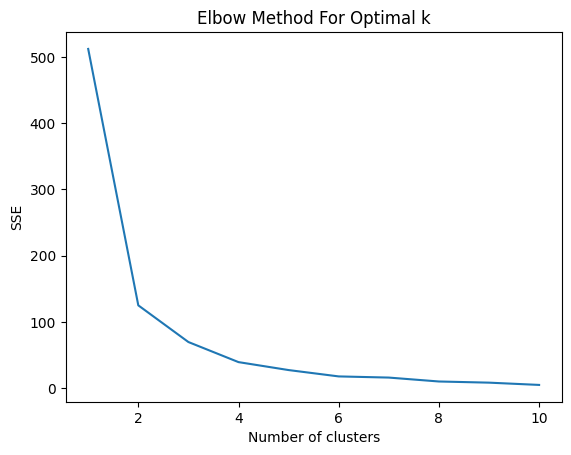

In [9]:
# Assuming you have another column to use in clustering, for example, 'Weekly_Reading_Time(hours)'
# Preparing data for clustering
X = df[['Mood_Impact_Numeric', 'Weekly_Reading_Time(hours)']]

# Calculate SSE for a range of k values
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    sse[k] = kmeans.inertia_  # SSE to closest cluster centroid

# Plotting the results
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method For Optimal k")
plt.show()

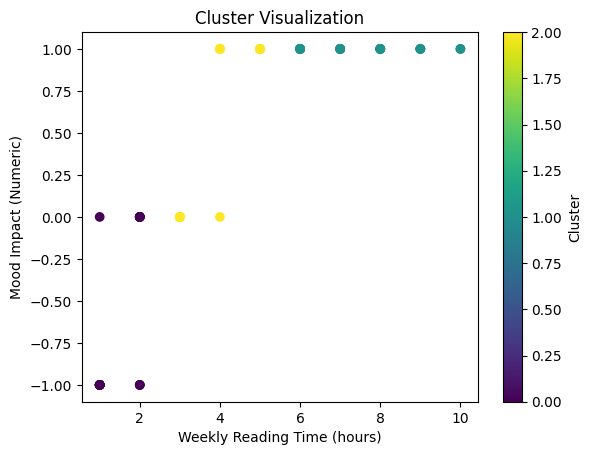

In [10]:
# Choose k based on the Elbow Method output, for example k=3
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=0).fit(X)
df['Cluster'] = kmeans.labels_

# Visualizing the clusters
plt.scatter(df['Weekly_Reading_Time(hours)'], df['Mood_Impact_Numeric'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Weekly Reading Time (hours)')
plt.ylabel('Mood Impact (Numeric)')
plt.title('Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()